<a href="https://colab.research.google.com/github/ProgrammerDavid1/Data-Analysis/blob/main/Data%20Analyze%2010)%20Data%20Dimensionality%20Reduction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석프로그래밍 15주차 실습

## 실습 시작 전 유의사항

※ 반드시 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.

## 실습 개요
 - PCA
 - AutoEncoder

---

## PCA (주성분 분석)

두 축으로 표현되는 데이터를 하나의 선에 사영시키면 축 한 개로 표현할 수 있습니다.\
이는 즉, 2개의 차원을 하나로 줄였다고 말할 수 있습니다.

<img src="https://velog.velcdn.com/images%2Fts5516%2Fpost%2F7af5c855-9ed1-40ab-83f2-7f9082d82954%2Fimage.png">


이때 이 선을 정하는 작업이 가장 중요한데, 어떻게 정하느냐에 따라 데이터의 분산이 줄어들게 되어 정보가 손실됩니다.\
그렇기에 차원을 축소함과 동시에 데이터의 분산을 최대한 보전하는 것이 PCA의 목표입니다.

<img src="https://biologicalmodeling.org/assets/images/pca_rotating_line.gif">

</br>

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*-urVoOnMFC3pvu_wquUl_A.png" width="60%">


### IRIS 붓꽃 데이터

IRIS 데이터셋을 사용하여 PCA 실습을 해보겠습니다.

3개의 레이블을 갖는 데이터셋입니다.\
feature는 SepalLength, SepalWidth, PetalLength, PetalWidth로 총 4가지 입니다.

각각 꽃받침과 꽃잎의 길이와 너비를 cm로 나타낸 값입니다.

<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" height=300>

이번 실습의 목표는 4개의 feature를 2개로 줄여서 KMeans 결과를 확인하는 것입니다.

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Specious"])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Specious
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 데이터 구성

X = df.drop("Specious",axis = 1)     # Specious열을 제외한 나머지를 X로 저장
y = df["Specious"]

feature_names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
pd.DataFrame(X, columns=feature_names).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


PCA 모델은 scikit-learn 모듈에서 이를 제공합니다.\
매개변수 n_components로 원하는 컴포넌트 수를 넣어주면 그만큼으로 차원을 축소해줍니다.

학습은 똑같이 fit을 사용하면 되지만 우리는 학습과 동시에 축소된 차원으로 변환시킨 데이터를 얻기 위해 fit_transform을 사용할 것입니다.

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 2)

#pca_model.fit(X)
#principalComponents = pca_model.transform(X)
principalComponents = pca_model.fit_transform(X)        # 데이터로 fit함과 동시에 transform된 데이터를 반환

# 변환 결과 확인
principal_df = pd.DataFrame(data=principalComponents, columns=["PrincipalComp1", "PrincipalComp2"])
principal_df["Specious"] = y
principal_df.head()

,PrincipalComp1,PrincipalComp2,Specious
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


아래 사진은 기존 4가지 feature를 모두 ploting 한 것입니다.\
PCA 결과와 비교해봅시다.

<img src="https://drive.google.com/uc?id=1G6tYyf0iselO6mh3z9qJ-i17T_GmFVTs">

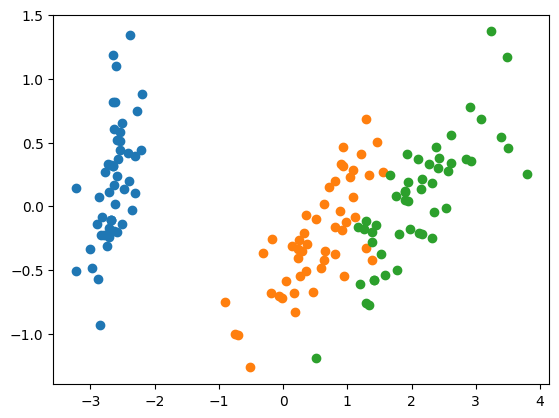

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for specious, group in principal_df.groupby('Specious'):
  ax.scatter(group['PrincipalComp1'], group['PrincipalComp2'])

4가지의 feature를 2가지로 축소시켰음에도 클러스터가 잘 구분되는 것을 확인할 수 있습니다.\
이를 통해 PCA가 성공적으로 이뤄졌다고 볼 수 있습니다.

In [ ]:
from sklearn.cluster import KMeans

# Kmeans 객체 생성
kmeans_model = KMeans(n_clusters=3,random_state=43)

# 모델 학습
kmeans_model.fit(principal_df[['PrincipalComp1','PrincipalComp2']])

# 클러스터링 결과 확인
iris_clust = pd.concat([principal_df, pd.DataFrame(kmeans_model.labels_)], axis=1)
iris_clust.columns = ['PrincipalComp1', 'PrincipalComp2','Species', 'KmeansFit']
pd.crosstab(iris_clust.Species, iris_clust.KmeansFit)

KmeansFit,0,1,2
Species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,47,3
Iris-virginica,0,14,36


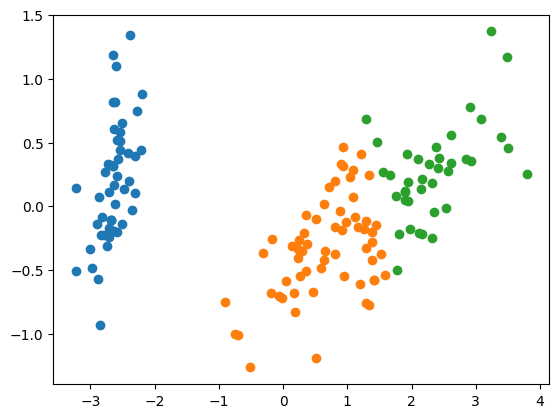

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for specious, group in iris_clust.groupby('KmeansFit'):
  ax.scatter(group['PrincipalComp1'], group['PrincipalComp2'])

---

##오토인코더
오토인코더는 입력데이터와 출력데이터가 같아지게끔 학습시키는 모델입니다.\
인코더 구조와 디코더 구조로 이루어져 있습니다.

잘 학습된 오코인코더는 다음과 같은 기능을 해줍니다.

- Encoder는 데이터를 새로운 차원으로 표현하는 역할을 해줍니다.\
차원 수를 입력 데이터보다 작게 만들면 PCA처럼 차원을 축소하는 역할도 할 수 있습니다.
- Latent vector에는 데이터의 압축된 정보들이 저장됩니다. 압축된 데이터의 분포를 확인해볼 수 있습니다.
- Decoder는 압축된 정보로부터 데이터를 복구하는 역할을 해줍니다.\
만약 데이터 분포에 있지 않은 정보를 제공한다면 새로운 데이터를 얻는 것도 가능합니다.

MNIST 데이터셋을 사용해서 오토인코더를 학습시켜 볼 것입니다.\
비지도학습이므로 따로 정답이 필요하지 않아서 test dataset은 다운받지 않아도 됩니다.


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import transforms, datasets

import numpy as np
import matplotlib.pyplot as plt

mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

BATCH_SIZE = 64
train_loader = DataLoader(dataset=mnist, batch_size=BATCH_SIZE, shuffle=True)

# 랜덤 데이터 시각화
#index = np.random.randint(0, 1000)
#plt.imshow(mnist.train_data[index].numpy(), cmap='gray')
#plt.title("Index: " + str(index) + ", label: " + str(mnist.train_labels[index]))
#plt.show()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.62MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



이번 실습에는 아래 그림처럼 Latent Vector가 더 작은 차원인 구조의 오토인코더를 구현해볼 것입니다.

그림을 바탕으로 인코더와 디코더를 구성해봅시다.

정답값은 출력 데이터와 같은 데이터이기 때문에 0~1의 숫자로 나타나야 합니다.\
그렇기 때문에 디코더의 마지막에는 Sigmoid 활성함수가 들어가야 함에 유의하세요.

<img src="https://drive.google.com/uc?id=1yjR6iOJWxP9s6FAHH9kKNfeWhKqiSPSx">

In [ ]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
    )

    self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# hyper-parameters
N_EPOCH = 2
N_TEST_IMG = 7
OFFSET = 11
learning_rate = 0.01

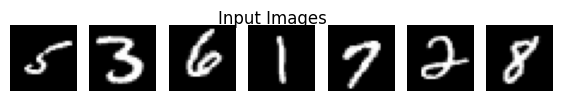

In [ ]:
view_data = mnist.data[OFFSET:OFFSET+N_TEST_IMG].flatten(1) / 255

fig, ax = plt.subplots(1, N_TEST_IMG, figsize=(N_TEST_IMG, 1))
fig.suptitle("Input Images")

for idx, data in enumerate(view_data):
  ax[idx].imshow(np.reshape(data, (28, 28)), cmap='gray')
  ax[idx].axis('off')

plt.show()

모델에 입력으로 들어가는 batch_X와 정답값으로 사용되는 batch_Y는 서로 같은 데이터가 들어가야 합니다.

In [ ]:
autoencoder = AutoEncoder()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

history = []
for epoch in range(N_EPOCH):
  for step, (data, target) in enumerate(train_loader):
    batch_X = data.flatten(1)
    batch_Y = data.flatten(1) # output should be same as input

    encoded, decoded = autoencoder(batch_X)
    loss = criterion(decoded, batch_Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 100 == 0:
      print(f"Epoch: {epoch}, Train Loss: {loss.item(): .4f}")

    # for animating only (not important)
    if epoch == 0 and (step <5 or step % 25 == 0) or epoch == 1 and (step % 400 == 0 or step > 935):
      _, decoded_data = autoencoder(view_data)
      history.append(decoded_data)

Epoch: 0, Train Loss:  0.2318
Epoch: 0, Train Loss:  0.0518
Epoch: 0, Train Loss:  0.0433
Epoch: 0, Train Loss:  0.0356
Epoch: 0, Train Loss:  0.0323
Epoch: 0, Train Loss:  0.0304
Epoch: 0, Train Loss:  0.0289
Epoch: 0, Train Loss:  0.0275
Epoch: 0, Train Loss:  0.0236
Epoch: 0, Train Loss:  0.0283
Epoch: 1, Train Loss:  0.0238
Epoch: 1, Train Loss:  0.0229
Epoch: 1, Train Loss:  0.0259
Epoch: 1, Train Loss:  0.0252
Epoch: 1, Train Loss:  0.0238
Epoch: 1, Train Loss:  0.0233
Epoch: 1, Train Loss:  0.0211
Epoch: 1, Train Loss:  0.0227
Epoch: 1, Train Loss:  0.0248
Epoch: 1, Train Loss:  0.0222


모델이 학습됨에 따라 점점 입력 이미지와 유사한 이미지를 출력하는 것을 확인할 수 있습니다.

In [ ]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots(2, N_TEST_IMG, figsize=(N_TEST_IMG, 2))
fig.suptitle("Reconstructed Images")
plt.close()

def init():
  for idx, data in enumerate(view_data):
    ax[0][idx].imshow(np.reshape(data, (28, 28)), cmap='gray')
    ax[0][idx].axis('off')

def animate(i):
  for idx, data in enumerate(history[i].data):
    ax[1][idx].imshow(np.reshape(data, (28, 28)), cmap='gray')
    ax[1][idx].axis('off')

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=10000 / len(history))

HTML(anim.to_html5_video())

학습된 데이터를 바탕으로 새로운 데이터를 생성해봅시다.\
Latent Vector의 분포를 바탕으로 난수 데이터를 만들어서 이를 Decoder에게 제공해 볼 것입니다.

<img src="https://user-images.githubusercontent.com/37393115/178479980-fd9b655f-557a-49bd-bd72-ebc824a2985f.png" width=600>

In [ ]:
with torch.no_grad():
  encoded, decoded = autoencoder(mnist.data.flatten(1) / 255)

  mean = encoded.mean().item()
  std = encoded.std().item()

  print(f"데이터의 분포 - 평균: {mean:.3f}, 표준편차: {std:.3f}")

데이터의 분포 - 평균: 0.055, 표준편차: 2.379


실제 숫자 이미지와 유사한 데이터도 나오지만 숫자라고 볼 수 없는 이미지도 생성되는 것을 확인할 수 있습니다.

이 예제는 Latent vector의 형태를 생각하지 않고 통계값을 바탕으로 나온 난수를 제공했지만,\
Latent vector가 가우시안 분포의 평균과 표준편차를 나타내도록 학습시키는 VAE 모델은 매우 적절한 생성 모델로 사용됩니다.

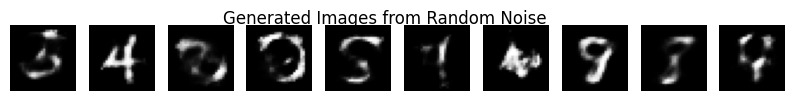

In [ ]:
N_GEN_IMG = 10

random_data = torch.normal(mean=mean, std=std, size=(N_GEN_IMG, 8))

generated = autoencoder.decoder(random_data)

fig, ax = plt.subplots(1, N_GEN_IMG, figsize=(N_GEN_IMG, 1))
fig.suptitle("Generated Images from Random Noise")

for i in range(N_GEN_IMG):
  ax[i].imshow(generated[i].data.reshape(28, 28), cmap='gray')
  ax[i].axis('off')

## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://i-cubic-i.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F725049b7-a462-4874-83d3-8d8fc3092f85%2F9e740721-91aa-4643-aeb1-e6c29aa7ff1f%2F%25EC%2595%25A1%25EC%2584%25B8%25EC%258A%25A4_%25EC%2584%25A4%25EC%25A0%2595.png?table=block&id=503f4d91-92ad-4768-a049-e7e926ef5871&spaceId=725049b7-a462-4874-83d3-8d8fc3092f85&width=1030" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.